In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
data = pd.read_csv('data/Finaltrain.csv')
data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,346,61,0,3,21
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,1225,203,3,29,79
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,345,60,0,9,24
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,451,76,0,10,33
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,145,27,0,2,10


In [4]:
# randomize data
data = data.sample(frac=1).reset_index(drop=True) # Mezclar los datos

data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,184dca7e24ee,3b9047,"At the top were pharaohs, viziers, and scribe...",0.088882,-0.594710,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,332,51,0,15,20
1,e09048fbddf2,ebad26,Workers would prepare rotten meat with better ...,0.205683,0.380538,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,419,78,0,12,32
2,b204a168d0a7,814d6b,Jones started it as an xperiment then added in...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,347,68,0,4,36
3,95c8b1d33694,3b9047,"In the ancient Egyptian system of government, ...",-0.066112,-0.715083,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,403,64,0,10,26
4,2fb4be37709b,814d6b,The purpose of the expieriment was to to show ...,-0.782641,-0.245970,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,226,39,0,2,17


## Preprocesamiento

In [5]:
# normalizar variables numéricas
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['text_length', 'word_count', 'number_count', 'punctuation_count', 'stopword_count']] = scaler.fit_transform(data[['text_length', 'word_count', 'number_count', 'punctuation_count', 'stopword_count']])

data.head()

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text,text_length,word_count,number_count,punctuation_count,stopword_count
0,184dca7e24ee,3b9047,"At the top were pharaohs, viziers, and scribe...",0.088882,-0.594710,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,0.056979,0.0464,0.0,0.095541,0.067114
1,e09048fbddf2,ebad26,Workers would prepare rotten meat with better ...,0.205683,0.380538,Summarize the various ways the factory would u...,Excerpt from The Jungle,With one member trimming beef ...,0.079718,0.0896,0.0,0.076433,0.107383
2,b204a168d0a7,814d6b,Jones started it as an xperiment then added in...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,0.060899,0.0736,0.0,0.025478,0.120805
3,95c8b1d33694,3b9047,"In the ancient Egyptian system of government, ...",-0.066112,-0.715083,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structure...,0.075536,0.0672,0.0,0.063694,0.087248
4,2fb4be37709b,814d6b,The purpose of the expieriment was to to show ...,-0.782641,-0.245970,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave ex...,0.029273,0.0272,0.0,0.012739,0.057047


In [6]:
tokenizer = Tokenizer(num_words=10000)  # Limitar a las 10,000 palabras más comunes
tokenizer.fit_on_texts(data['text'] + ' ' + data['prompt_text'])

In [7]:
sequences = tokenizer.texts_to_sequences(data['text'] + ' ' + data['prompt_text'])

In [8]:
maxlen = 200  # Puedes ajustar este valor según la longitud promedio
X = pad_sequences(sequences, maxlen=maxlen)

In [9]:
# Combinar las etiquetas en una matriz
y = data[['content', 'wording']].values

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Separar las etiquetas después de la división
y_content_train = y_train[:, 0]
y_wording_train = y_train[:, 1]
y_content_test = y_test[:, 0]
y_wording_test = y_test[:,1]

## RNN

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout


In [12]:
input_ = Input(shape=(maxlen,))

x = Embedding(input_dim=10000, output_dim=128, input_length=maxlen)(input_)

x = LSTM(256, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(128, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(64, return_sequences=False)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)

C:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
# Predicción de content
content_output = Dense(1, activation='linear', name='content')(x)

# Predicción de wording
wording_output = Dense(1, activation='linear', name='wording')(x)

In [14]:
optimizer = 'adam'
loss = 'mean_squared_error'
metrics = {
    'content': ['mae'],   # Métrica para la salida 'content'
    'wording': ['mae']    # Métrica para la salida 'wording'
}
epochs = 15
batch_size = 256


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [16]:
model = Model(inputs=input_, outputs=[content_output, wording_output])
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [17]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 200, 128)  │  1,280,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 200, 256)  │    394,240 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 200, 256)  │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 200, 128)  │    197,120 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 200, 128)  │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 64)        │     49,408 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      4,160 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      2,080 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ content (Dense)     │ (None, 1)         │         33 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wording (Dense)     │ (None, 1)         │         33 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,927,074 (7.35 MB)

 Trainable params: 1,927,074 (7.35 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    X_train, 
    [y_content_train, y_wording_train], 
    validation_data=(X_test, [y_content_test, y_wording_test]), 
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/15
23/23 - 26s - 1s/step - content_mae: 0.6351 - loss: 1.5209 - wording_mae: 0.7193 - val_content_mae: 0.4737 - val_loss: 1.0411 - val_wording_mae: 0.6382
Epoch 2/15
23/23 - 23s - 1s/step - content_mae: 0.4464 - loss: 0.8843 - wording_mae: 0.5813 - val_content_mae: 0.4037 - val_loss: 0.8352 - val_wording_mae: 0.5746
Epoch 3/15
23/23 - 24s - 1s/step - content_mae: 0.4244 - loss: 0.7741 - wording_mae: 0.5382 - val_content_mae: 0.3868 - val_loss: 0.7646 - val_wording_mae: 0.5438
Epoch 4/15
23/23 - 24s - 1s/step - content_mae: 0.3848 - loss: 0.6419 - wording_mae: 0.4881 - val_content_mae: 0.3703 - val_loss: 0.7173 - val_wording_mae: 0.5300
Epoch 5/15
23/23 - 23s - 995ms/step - content_mae: 0.3709 - loss: 0.5718 - wording_mae: 0.4531 - val_content_mae: 0.4037 - val_loss: 0.7860 - val_wording_mae: 0.5476
Epoch 6/15
23/23 - 25s - 1s/step - content_mae: 0.3523 - loss: 0.5155 - wording_mae: 0.4295 - val_content_mae: 0.3809 - val_loss: 0.7429 - val_wording_mae: 0.5470
Epoch 7/15
23/23 - 

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_content_pred, y_wording_pred = model.predict(X_test)

print('MAE content:', mean_absolute_error(y_content_test, y_content_pred))
print('MSE content:', mean_squared_error(y_content_test, y_content_pred))
print('R2 content:', r2_score(y_content_test, y_content_pred))

print('\nMAE wording:', mean_absolute_error(y_wording_test, y_wording_pred))
print('MSE wording:', mean_squared_error(y_wording_test, y_wording_pred))
print('R2 wording:', r2_score(y_wording_test, y_wording_pred))

45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step
MAE content: 0.3702878222185503
MSE content: 0.24775582701428822
R2 content: 0.7923944357085801

MAE wording: 0.5299778978436497
MSE wording: 0.46954239401188236
R2 wording: 0.5929447955491355


# Guardando el modelo

In [20]:
import pickle

# Guardar el modelo
model.save("models/rnn.keras")

with open('models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
import matplotlib.pyplot as plt

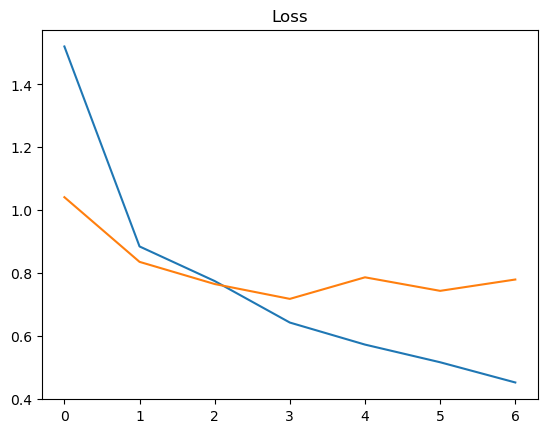

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.show()

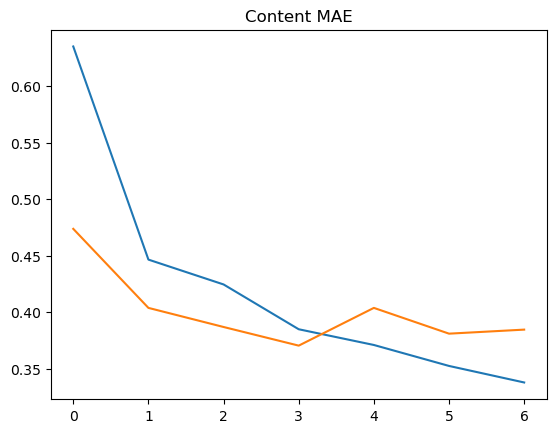

In [23]:
plt.plot(history.history['content_mae'])
plt.plot(history.history['val_content_mae'])
plt.title('Content MAE')
plt.show()

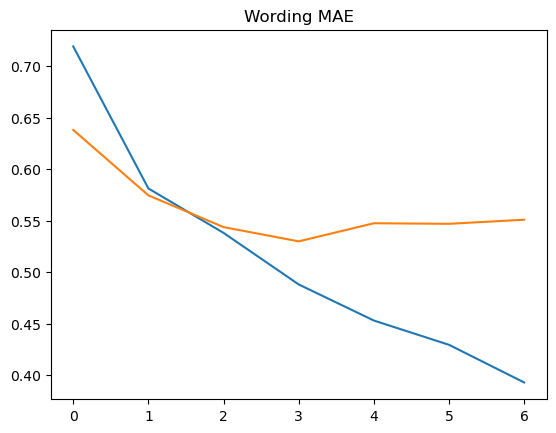

In [24]:
plt.plot(history.history['wording_mae'])
plt.plot(history.history['val_wording_mae'])
plt.title('Wording MAE')
plt.show()

# Cargando el modelo

In [25]:
from tensorflow.keras.models import load_model

model = load_model('rnn')

ValueError: File format not supported: filepath=rnn. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(rnn, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).